# Trading Dataset: S&P 500

In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn import grid_search
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'sklearn.cross_validation'

# Importing Dataset

In [23]:
mydataset = pd.read_csv('dataset1.csv')
spy = mydataset.iloc[:,:].values
spy.shape[0]
mydataset.head(5)

,Date,EMA10,EMA25,USD/JPY,USD/EUR,USD/GBP,USD/HKD,GOLD,OIL,UK rate,Euro rate,FFR,T10Y-T2Y,OUPUT
0,2000-02-08,0.01577,0.00949,0.00074,0.00059,0.01084,0.00008,-0.00662,0.00035,0.0575,0.0225,0.0567,-0.0010,0
1,2000-02-09,0.01594,0.01207,0.00027,0.00030,-0.00048,0.00003,0.01404,0.00071,0.0575,0.0225,0.0576,-0.0013,-1
2,2000-02-10,-0.00292,-0.00711,-0.00064,0.00099,-0.00500,0.00005,-0.00588,0.00591,0.0600,0.0225,0.0579,0.0000,0
3,2000-02-11,-0.00077,-0.00499,0.00046,0.00020,-0.00788,0.00008,0.00696,0.00034,0.0600,0.0225,0.0571,-0.0002,-1
4,2000-02-14,-0.01115,-0.01739,-0.00230,-0.00030,-0.00335,0.00005,0.00032,0.00000,0.0600,0.0225,0.0579,-0.0006,0


In [24]:
spy

array([['2000-02-08', 0.01577, 0.00949, ..., 0.0567, -0.001, 0],
       ['2000-02-09', 0.01594, 0.01207, ..., 0.0576, -0.0013, -1],
       ['2000-02-10', -0.00292, -0.007109999999999999, ..., 0.0579, 0.0,
        0],
       ...,
       ['2018-11-07', 0.01938, 0.006809999999999999, ..., 0.0219, 0.0026,
        1],
       ['2018-11-08', 0.02278, 0.01455, ..., 0.0219, 0.0026, 0],
       ['2018-11-09', 0.01438, 0.0094, ..., 0.022000000000000002, 0.0025,
        0]], dtype=object)

# Tuning functions

In [25]:
def log_tune_pred(x_train,y_train,x_test,y_test):
  logistic = LogisticRegression()
  parameter_logistic1 = {'tol':[0.00001, 0.01], 
                       'C':[1e-4,1e-2,0.1,1,10], 
                       'solver':('newton-cg', 'sag', 'lbfgs'),
                      'tol' : [1e-2,1] , 'max_iter' : [100,1000,10000]}

  CV_logistic1 = GridSearchCV(logistic, parameter_logistic1, cv = 5)
  CV_logistic1.fit(x_train, y_train.astype('float'))
  predlog1 = CV_logistic1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predlog1)
  return acc

In [26]:
def rf_tune_pred(x_train,y_train,x_test,y_test):
  rfc = RandomForestClassifier()
  parameter_rfc1 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


  CV_rfc1 = GridSearchCV(rfc, parameter_rfc1, cv = 5)
  CV_rfc1.fit(x_train, y_train.astype('float'))
  predrf = CV_rfc1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predrf)
  return acc

In [27]:
def svm_tune_pred(x_train,y_train,x_test,y_test):
  svm = SVC()
  parameter_svm1 = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
                  'C':[0.1, 10],
                  'gamma':[0.01,0.9]}

  CV_svm1 = GridSearchCV(svm, parameter_svm1, cv = 5)
  CV_svm1.fit(x_train, y_train.astype('float'))
  predsvm1 = CV_svm1.predict(x_test)
  acc = accuracy_score(y_test.astype("float"),predsvm1)
  return acc

# Splitting strategy 1 
All records up to the split point are taken as the training dataset and all records from the split point to the end of the list of observations are taken as the test set.

In [28]:
train_size = int(len(spy) * 0.9)
train, test = spy[0:train_size], spy[train_size:len(spy)]

In [29]:
print(train.shape)
print(test.shape)

(4252, 14)
(473, 14)


In [30]:
x_train=train[:,1:-1]
print(x_train.shape)
y_train = train[:,13]
print(y_train.shape)

x_test=test[:,1:-1]
print(x_test.shape)
y_test = test[:,13]
print(y_test.shape)

(4252, 12)
(4252,)
(473, 12)
(473,)


In [31]:
 ## evaluate models
accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
accu_rf = rf_tune_pred(x_train,y_train,x_test,y_test)
accu_svm = svm_tune_pred(x_train,y_train,x_test,y_test)
  
print('Observations: %d' % (len(train) + len(test)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
  
print("Accuracy Logistic:", accu_log)
print("Accuracy Random Forest:",  accu_rf)
print("Accuracy SVM:",  accu_svm)

Observations: 4725
Training Observations: 4252
Testing Observations: 473
Accuracy Logistic: 0.7780126849894292
Accuracy Random Forest: 0.7758985200845666
Accuracy SVM: 0.7758985200845666


# Splitting strategy 2
Splitting the time series into train and test sets multiple times.

Requires multiple models to be trained and evaluated, but this additional computational expense provides a more robust estimate of the expected performance of the chosen method and configuration on unseen data.

In [32]:
X=spy
splits = TimeSeriesSplit(n_splits=4)

In [34]:
accuracies_log = []
accuracies_rf = []
accuracies_svm = []
for train_index,test_index in splits.split(X):
  ## split data
    train = X[train_index]
    x_train = train[:,1:-1]
    y_train = train[:,-1]
  
    test = X[test_index]
    x_test = test[:,1:-1]
    y_test = test[:,-1]
  
  ## evaluate models
accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
accuracies_log.append(accu_log)
  
accu_rf = rf_tune_pred(x_train,y_train,x_test,y_test)
accuracies_rf.append(accu_rf)
  
accu_svm = svm_tune_pred(x_train,y_train,x_test,y_test)
accuracies_svm.append(accu_svm)
    
print('Observations: %d' % (len(train) + len(test)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
  
#print("Accuracy for Logistic Regression second splitting strategy: ",accuracies)
print("Mean accuracy Logistic:",  np.mean(accuracies_log))
print("Mean accuracy Random Forest:",  np.mean(accuracies_rf))
print("Mean accuracy SVM:",  np.mean(accuracies_svm))

Observations: 4725
Training Observations: 3780
Testing Observations: 945
Mean accuracy Logistic: 0.7111111111111111
Mean accuracy Random Forest: 0.7153439153439154
Mean accuracy SVM: 0.7153439153439154


ValueError: x and y must have same first dimension, but have shapes (5,) and (1,)

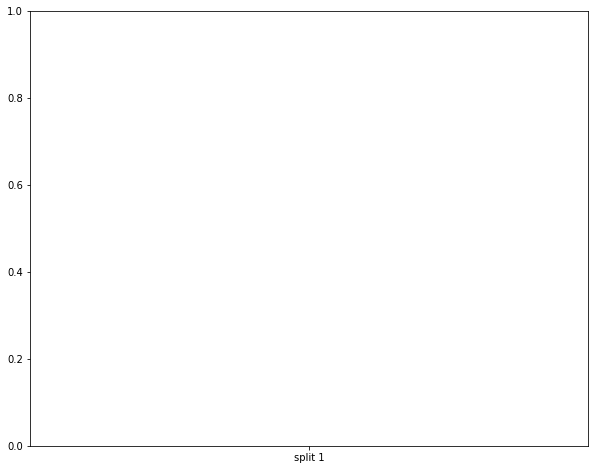

In [36]:
labels = ["split 1","split 2","split 3",'split 4','split 5']  
plt.figure(figsize = (10,8))
plot_log, = plt.plot(labels,accuracies_log,label="logistic regression")
plot_rf, = plt.plot(labels,accuracies_rf, label = "random forest")
plt.legend(handles=[plot_log,plot_rf],loc=1)
plt.title("Logistic regression")

# Splitting strategy 3

In [37]:
n_train = 4000
n_records = len(X)
accuracies_log_st2 = []
for i in range(n_train, n_records):
  train = X[0:i]
  test = X[i:i+1]
  x_train = train[:,1:-1]
  y_train = train[:,-1]
  x_test = test[:,1:-1]
  y_test = test[:,-1]
  
  ## evaluate models
  accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
  accuracies_log_st2.append(accu_log)
  
print("Mean accuracy Logistic:",  np.mean(accuracies_log))

KeyboardInterrupt: 

In [ ]:
n_train = 4242
n_records = len(X)
accuracies_log_st2 = []
for i in range(n_train, n_records):
	train, test = X[0:i], X[i:i+1]
  x_train = train[:,1:-1]
  y_train = train[:,-1]
  x_test = test[:,1:-1]
  y_test = test[:,-1]
  
  ## evaluate models
  accu_log = log_tune_pred(x_train,y_train,x_test,y_test)
  accuracies_log_st2.append(accu_log)
  
  print("Mean accuracy Logistic:",  np.mean(accuracies_log))
	#print('train=%d, test=%d' % (len(train), len(test)))

# Splitting Dataset

In [38]:
#4-FOLD FORWARD CHAINING
#70% train, 30% validation
#https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9
#https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/

from sklearn.model_selection import train_test_split

#FOLD 1
x1 = features[0:1725,:]
y1 = output[0:1725]
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.20, train_size=0.80)
x_train1 = x_train1.astype('float')
y_train1 = y_train1.astype('int')
x_test1 = x_train1.astype('float')
y_test1 = y_train1.astype('int')
print('FOLD 1 train feature shape:',x_train1.shape)
print('FOLD 1 train output shape:',y_train1.shape)
print('FOLD 1 test feature shape:',x_test1.shape)
print('FOLD 1 test output shape:',y_test1.shape)


#FOLD 2
x2 = features[0:2725,:]
y2 = output[0:2725]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.20, train_size=0.80)
x_train2 = x_train2.astype('float')
y_train2 = y_train2.astype('int')
x_test2 = x_train2.astype('float')
y_test2 = y_train2.astype('int')
print('FOLD 2 train feature shape:',x_train2.shape)
print('FOLD 2 train output shape:',y_train2.shape)
print('FOLD 2 test feature shape:',x_test2.shape)
print('FOLD 2 test output shape:',y_test2.shape)


#FOLD 3
x3 = features[0:3725,:]
y3 = output[0:3725]
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.20, train_size=0.80)
x_train3 = x_train3.astype('float')
y_train3 = y_train3.astype('int')
x_test3 = x_train3.astype('float')
y_test3 = y_train3.astype('int')
print('FOLD 3 train feature shape:',x_train3.shape)
print('FOLD 3 train output shape:',y_train3.shape)
print('FOLD 3 test feature shape:',x_test3.shape)
print('FOLD 3 test output shape:',y_test3.shape)


#FOLD 4
x4 = features[0:4725,:]
y4 = output[0:4725]
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.20, train_size=0.80)
x_train4 = x_train4.astype('float')
y_train4 = y_train4.astype('int')
x_test4 = x_train4.astype('float')
y_test4 = y_train4.astype('int')
print('FOLD 4 train feature shape:',x_train4.shape)
print('FOLD 4 train output shape:',y_train4.shape)
print('FOLD 4 test feature shape:',x_test4.shape)
print('FOLD 4 test output shape:',y_test4.shape)




NameError: name 'features' is not defined

# RANDOM FOREST

In [22]:
rfc = RandomForestClassifier()

#FOLD1
parameter_rfc1 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


CV_rfc1 = GridSearchCV(rfc, parameter_rfc1, cv = 5)
CV_rfc1.fit(x_train1, y_train1)
print("Best parameters for Random forest 1: ",CV_rfc1.best_params_)

rfc1 = RandomForestClassifier(criterion = 'gini',
                              max_depth = 20,
                              max_features = 'auto',
                              min_impurity_decrease = 0.0001,
                              min_samples_leaf = 20,
                              min_samples_split = 20,
                              n_estimators = 200)
rfc1.fit(x_train1, y_train1)
predrfc1 = rfc1.predict(x_test1)
print("Test accuracy for Random Forest on FOLD 1: ",accuracy_score(y_test1,predrfc1))



#FOLD2
parameter_rfc2 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


CV_rfc2 = GridSearchCV(rfc, parameter_rfc2, cv = 5)
CV_rfc2.fit(x_train2, y_train2)
print("Best parameters for Random forest 2: ",CV_rfc2.best_params_)

rfc2 = RandomForestClassifier(criterion = 'gini',
                              max_depth = 20,
                              max_features = 'auto',
                              min_impurity_decrease = 0.0001,
                              min_samples_leaf = 20,
                              min_samples_split = 2,
                              n_estimators = 200)
rfc2.fit(x_train2, y_train2)
predrfc2 = rfc2.predict(x_test2)
print("Test accuracy for Random Forest on FOLD 2: ",accuracy_score(y_test2,predrfc2))



#FOLD3
parameter_rfc3 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}


CV_rfc3 = GridSearchCV(rfc, parameter_rfc3, cv = 5)
CV_rfc3.fit(x_train3, y_train3)
print("Best parameters for Random forest 3: ",CV_rfc3.best_params_)

rfc3 = RandomForestClassifier(criterion = 'gini',
                              max_depth = 20,
                              max_features = 'auto',
                              min_impurity_decrease = 0.0001,
                              min_samples_leaf = 20,
                              min_samples_split = 2,
                              n_estimators = 10)
rfc3.fit(x_train3, y_train3)
predrfc3 = rfc3.predict(x_test3)
print("Test accuracy for Random Forest on FOLD 3: ",accuracy_score(y_test3,predrfc3))



#FOLD4
parameter_rfc4 = {'n_estimators':[10, 200], 
                   'criterion':('gini', 'entropy'),'max_depth':[1,20], 
                   'min_samples_split':[2,20], 
                   'min_samples_leaf':[1,20], 
                   'max_features':('auto','sqrt','log2'),
                   'min_impurity_decrease':[0.0001,0.9999]}

CV_rfc4 = GridSearchCV(rfc, parameter_rfc4, cv = 5)
CV_rfc4.fit(x_train4, y_train4)
print("Best parameters for Random forest 4: ",CV_rfc4.best_params_)

rfc4 = RandomForestClassifier(criterion = 'entropy',
                              max_depth = 20,
                              max_features = 'auto',
                              min_impurity_decrease = 0.0001,
                              min_samples_leaf = 20,
                              min_samples_split = 2,
                              n_estimators = 200)
rfc4.fit(x_train4, y_train4)
predrfc4 = rfc4.predict(x_test4)
print("Accuracy for Random Forest on FOLD 4: ",accuracy_score(y_test4,predrfc4))


#AVERAGES
score_test_array = np.array([accuracy_score(y_test1,predrfc1),accuracy_score(y_test2,predrfc2), accuracy_score(y_test3,predrfc3), accuracy_score(y_test4,predrfc4)])
mean_score_test = np.mean(score_test_array) 
print('Average accuracy on test set:',mean_score_test)


NameError: name 'x_train1' is not defined

# LOGISTIC REGRESSION

In [ ]:
logistic = LogisticRegression()

#FOLD1
parameter_logistic1 = {'tol':[0.00001, 0.01], 
                       'C':[0.1, 10], 
                       'solver':('newton-cg', 'sag', 'lbfgs')}

CV_logistic1 = GridSearchCV(logistic, parameter_logistic1, cv = 5)
CV_logistic1.fit(x_train1, y_train1)
print("Best parameters for Logistic Regression 1: ", CV_logistic1.best_params_)

logistic1 = LogisticRegression(C = 10, solver = 'sag', tol= 0.01)
logistic1.fit(x_train1, y_train1)
predlog1 = logistic1.predict(x_test1)
print("Accuracy for Logistic Regression on FOLD 1: ",accuracy_score(y_test1,predlog1))


#FOLD2
parameter_logistic2 = {'tol':[0.00001, 0.01], 
                       'C':[0.1, 10], 
                       'solver':('newton-cg', 'sag', 'lbfgs')}

CV_logistic2 = GridSearchCV(logistic, parameter_logistic2, cv = 5)
CV_logistic2.fit(x_train2, y_train2)
print("Best parameters for Logistic Regression 2: ", CV_logistic2.best_params_)

logistic2 = LogisticRegression(C = 10, solver = 'sag', tol = 0.01)
logistic2.fit(x_train2, y_train2)
predlog2 = logistic2.predict(x_test2)
print("Accuracy for Logistic Regression on FOLD 2: ",accuracy_score(y_test2,predlog2))

#FOLD3
parameter_logistic3 = {'tol':[0.00001, 0.01], 
                       'C':[0.1, 10], 
                       'solver':('newton-cg', 'sag', 'lbfgs')}

CV_logistic3 = GridSearchCV(logistic, parameter_logistic3, cv = 5)
CV_logistic3.fit(x_train3, y_train3)
print("Best parameters for Logistic Regression 3: ", CV_logistic3.best_params_)

logistic3 = LogisticRegression(C = 10, solver = 'sag', tol= 0.01)
logistic3.fit(x_train3, y_train3)
predlog3 = logistic3.predict(x_test3)
print("Accuracy for Logistic Regression on FOLD 3: ",accuracy_score(y_test3,predlog3))


#FOLD4
parameter_logistic4 = {'tol':[0.00001, 0.01], 
                       'C':[0.1, 10], 
                       'solver':('newton-cg', 'sag', 'lbfgs')}
CV_logistic4 = GridSearchCV(logistic, parameter_logistic4, cv = 5)
CV_logistic4.fit(x_train4, y_train4)
print("Best parameters for Logistic Regression 4: ", CV_logistic4.best_params_)

logistic4 = LogisticRegression(C = 10, solver = 'sag', tol= 0.01)
logistic4.fit(x_train4, y_train4)
predlog4 = logistic4.predict(x_test4)
print("Accuracy for Logistic Regression on FOLD 4: ",accuracy_score(y_test4,predlog4))

#AVERAGES
score_test_array = np.array([accuracy_score(y_test1,predlog1),accuracy_score(y_test2,predlog2), accuracy_score(y_test3,predlog3), accuracy_score(y_test4,predlog4)])
mean_score_test = np.mean(score_test_array) 
print('Average accuracy on test set:',mean_score_test)



# SVM

In [ ]:
svm = SVC()

#FOLD1
parameter_svm1 = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
                  'C':[0.1, 10],
                  'gamma':[0.01,0.9]}

CV_svm1 = GridSearchCV(svm, parameter_svm1, cv = 2)
CV_svm1.fit(x_train1, y_train1)
print("Best parameters for SVM1: ", CV_svm1.best_params_)
print("Best score for SVM1: ", CV_svm1.best_score_)

svm1 = SVC(C = 0.1, kernel = 'rbf', gamma = 0.9, decision_function_shape = 'ovo')
svm1.fit(x_train1, y_train1)
predsvm1 = svm1.predict(x_test1)
print("Accuracy for SVM on FOLD 1: ",accuracy_score(y_test1,predsvm1))



#FOLD2
parameter_svm2 = {'kernel':('linear', 'rbf', 'poly'), 
                  'C':[0.1, 10]}

CV_svm2 = GridSearchCV(svm, parameter_svm2, cv = 5)
CV_svm2.fit(x_train2, y_train2)
print("Best parameters for SVM2: ", CV_svm2.best_params_)

svm2 = SVC(C = 10, kernel = 'linear')
svm2.fit(x_train2, y_train2)
predsvm2 = svm2.predict(x_test2)
print("Accuracy for SVM on FOLD 2: ",accuracy_score(y_test2,predsvm2))

#FOLD3
parameter_svm3 = {'kernel':('linear', 'rbf', 'poly'), 
                  'C':[1, 10]}

CV_svm3 = GridSearchCV(svm, parameter_svm3, cv = 5)
CV_svm3.fit(x_train3, y_train3)
print("Best parameters for SVM3: ", CV_svm3.best_params_)

svm3 = SVC(C = 1, kernel = 'linear')
svm3.fit(x_train3, y_train3)
predsvm3 = svm2.predict(x_test3)
print("Accuracy for SVM on FOLD 3: ",accuracy_score(y_test3,predsvm3))

#FOLD4
parameter_svm4 = {'kernel':('linear', 'rbf', 'poly'), 
                  'C':[1, 10]}

CV_svm4 = GridSearchCV(svm, parameter_svm4, cv = 5)
CV_svm4.fit(x_train4, y_train4)
print("Best parameters for SVM4: ", CV_svm4.best_params_)

svm4 = SVC(C = 1, kernel = 'linear')
svm4.fit(x_train4, y_train4)
predsvm4 = svm4.predict(x_test4)
print("Accuracy for SVM on FOLD 4: ",accuracy_score(y_test4,predsvm4))


#AVERAGES
score_test_array = np.array([accuracy_score(y_test1,predsvm1),accuracy_score(y_test2,predsvm2), accuracy_score(y_test3,predsvm3), accuracy_score(y_test4,predsvm4)])
mean_score_test = np.mean(score_test_array) 
print('Average accuracy on test set:',mean_score_test)


# NEURAL NETWORK

In [15]:
from sklearn.neural_network import MLPClassifier

#FOLD1
parameter_NN1 = {'hidden_layer_sizes':[1, 10],'activation':('identity', 'relu','logistic', 'tanh'),
                 'solver':('lbfgs', 'sgd', 'adam'), 'alpha':[0.00001,0.01], 'batch_size':[10,100],
                'learning_rate':('constant','invscaling','adaptive'), 'learning_rate_init':[0.00001,0.01],
                'tol':[0.000001,0.01]}
NN1_train = MLPClassifier()
NN1_train.fit(x_train1, y_train1)
NN1_valid = GridSearchCV(NN1_train, parameter_NN1)
NN1_valid.fit(x_valid1, y_valid1)
SVM1_valid.fit(x_train1, y_train1)
print(NN1_valid.best_params_)
NN1_score_train1 = NN1_train.score(x_train1, y_train1)
NN1_score_valid1 = NN1_valid.score(x_valid1, y_valid1)
NN1_score_test1 = NN1_valid.score(x_test1, y_test1)
print('Accuracy on the training set 1: {:.3f}'.format(NN1_score_train1))
print('Accuracy on the validation set 1: {:.3f}'.format(NN1_score_valid1))
print('Accuracy on the test set 1: {:.3f}'.format(NN1_score_test1))
print(NN1.predict(x_test1))

NameError: name 'x_train1' is not defined